In [50]:
# 对ECB+数据集的一些统计
import sys
sys.path.append("../..")
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
from preprocessing.Structurize.EcbClass import *

In [4]:
ECB = EcbPlusTopView()

EcbInstance iid=ACT17757159242353715, mid=49 in 1_19ecb.xml has no components
EcbInstance iid=ACT17757148989750169, mid=40 in 1_19ecb.xml has no components
EcbInstance iid=HUM17403785688719729, mid=36 in 12_3ecb.xml has no components
EcbInstance iid=HUM17731760781196568, mid=26 in 18_9ecb.xml has no components
No sentences are selected in this file: (20, '10ecbplus')
EcbInstance iid=ACT18234626597278210, mid=21 in 21_5ecb.xml has no components
No sentences are selected in this file: (34, '5ecb')
No sentences are selected in this file: (36, '7ecbplus')
EcbInstance iid=ACT17764126188523329, mid=44 in 40_8ecbplus.xml has no components
EcbInstance iid=LOC18158686346228463, mid=76 in 41_5ecb.xml has no components
No sentences are selected in this file: (44, '1ecbplus')
No sentences are selected in this file: (44, '9ecbplus')
No sentences are selected in this file: (44, '13ecbplus')


In [18]:
# 每个topic有多少文档，多少ecb文档，多少ecb+文档
df_doc_for_topic = DataFrame(columns=["topic_id", "doc_num", "ecb_num", "plus_num", "sentence_dum", "selected_sentence_num"])
for topic_id, topic in ECB.document_view.topics_dict.items():
    sr = Series()
    sr['topic_id'] = topic_id
    sr['doc_num'] = len(topic.documents_dict.keys())
    sr['ecb_num'] = len([doc_name for doc_name in topic.documents_dict.keys() if doc_name.endswith("ecb.xml")])
    sr['plus_num'] = len([doc_name for doc_name in topic.documents_dict.keys() if doc_name.endswith("ecbplus.xml")])
    sr['sentence_dum'] = 0
    sr['selected_sentence_num'] = 0
    for doc_name, doc in topic.documents_dict.items():
        for sid, sentence in doc.all_sentences_dict.items():
            sr['sentence_dum'] += 1
            sr['selected_sentence_num'] += 1 if sentence.selected else 0
    df_doc_for_topic = df_doc_for_topic.append(sr, ignore_index=True)
df_doc_for_topic

,topic_id,doc_num,ecb_num,plus_num,sentence_dum,selected_sentence_num
0,1,39,18,21,334,96
1,2,21,10,11,366,41
2,3,20,9,11,325,40
3,4,24,14,10,465,38
4,5,23,13,10,410,31
5,6,20,9,11,288,29
6,7,21,10,11,285,32
7,8,19,8,11,429,28
8,9,23,10,13,547,24
9,10,21,8,13,286,26


In [20]:
# 所有的topic内句子对数量
sum([num*(num-1)/2 for num in df_doc_for_topic["selected_sentence_num"]])

42271.0

In [27]:
# ecbplus 第一句是否全是网址(http)
count_http = 0
count_non_http = 0
non_http_list = []
for topic_id, topic in ECB.document_view.topics_dict.items():
    for doc_name, doc in topic.documents_dict.items():
        if doc_name.endswith("ecbplus.xml"):
            sentence = doc.all_sentences_dict[0]
            if sentence.text().startswith("http"):
                count_http += 1
            else:
                count_non_http += 1
                non_http_list.append(sentence.text())
print(count_http, count_non_http)

502 0


In [34]:
# ecbplus 第一句是否全是网址(http)
third_sentence_list = []
for topic_id, topic in ECB.document_view.topics_dict.items():
    for doc_name, doc in topic.documents_dict.items():
        if doc_name.endswith("ecbplus.xml"):
            try:
                third_sentence_list.append(doc.all_sentences_dict[2].text())
            except KeyError:
                continue

In [37]:
third_sentence_list[:30]

['First Published : June 13 , 2013 4 : 59 PM EDT',
 'Lawyer : Lindsay Lohan checks into rehab facility',
 '14 June 2013',
 'May 2 , 2013',
 'May 3 , 2013 | 8 : 20 am',
 'Fri . , May . 3 , 2013 11 : 45 AM PDT',
 'May 02 , 2013',
 'Published May 03 , 2013',
 'After she abruptly left a rehab facility in Newport Beach on Thursday , Lindsay Lohan has checked into the Betty Ford Center in Rancho Mirage .',
 'May 03 , 2013',
 'Actress Lindsay Lohan finally checked into court - mandated rehab at the Betty Ford Center late Thursday , after hiring former lawyer Shawn Holley for help .',
 'May 2 , 2013 | 5 : 03pm',
 '05 / 02 / 2013',
 'UPDATED 05 / 03 / 2013 at 11 : 00 AM EDT',
 'May 3rd , 2013 2 : 00pm EDT',
 'May 2 , 2013 1 : 35 pm .',
 'May 3 , 2013 at 7 : 31 AM ET',
 '12 : 52 p . m . EDT May 2 , 2013',
 'MAY 3 , 2013 AT 1 : 10PM',
 'Posted on Thu Jun 13 , 2013 08 : 45 AM PDT',
 'May 2 , 2013 12 : 50 PM',
 'Friday August 2 , 2013 @ 8 : 13am PDT',
 'August 2 , 2013',
 'Published August 02 , 201

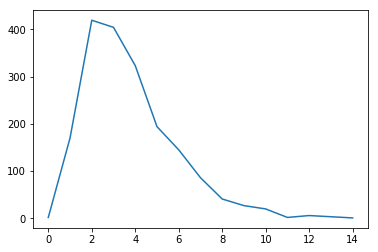

In [52]:
# 每句话拥有的event mention数量
sentence_mention_count = Series()
for topic_id, topic in ECB.document_view.topics_dict.items():
    for doc_name, doc in topic.documents_dict.items():
        for sid, sentence in doc.all_sentences_dict.items():
            if sentence.selected:
                sentence_mention_count[sentence.sid()] = len([component for component in sentence.components_dict.values() if component.tag.startswith(("ACTION","NEG_ACTION"))])
sentence_mention_count = sentence_mention_count.value_counts().sort_index()
sentence_mention_count.plot()
plt.show()

In [48]:
sentence_mention_count.value_counts().sort_index()

0       2
1     170
2     419
3     404
4     323
5     194
6     145
7      86
8      41
9      27
10     20
11      2
12      6
14      1
dtype: int64